In [110]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt
from collections import deque

# from importlib import reload


if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    # sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    sys.path.insert(0, "../src/")
    sys.path.insert(0, "../")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube2/tests/")
    print('installed')

from qube.utils import set_mpl_theme, fig, sbp

# just some handy helpers from old Qube
# from ta_helpers import kama, kama_indicator, apply_to_frame
import tests.qube.ta.utils_for_testing as test

# %load_ext cython

T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
ds = 100 + (1*np.random.randn(len(T))).cumsum()
data = list(zip(T, ds))
set_mpl_theme('dark')

installed


## Cython v2 tests (series)

In [86]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.series import TimeSeries
del sys.modules['qube.core.series']
from qube.core.series import (
    TimeSeries, sma, ema, tema, dema, kama, recognize_time, OHLCV, RollingSum, lag, compare, highest, lowest, Minus
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Series example

In [3]:
# %%timeit
ts = TimeSeries('test', '10Min')
ts.update(recognize_time('2024-01-01 00:00'), 1)
ts.update(recognize_time('2024-01-01 00:01'), 5)
ts.update(recognize_time('2024-01-01 00:06'), 2)
ts.update(recognize_time('2024-01-01 00:12'), 3)
ts.update(recognize_time('2024-01-01 00:21'), 4)
ts.update(recognize_time('2024-01-01 00:22'), 5)
ts.update(recognize_time('2024-01-01 00:31'), 6)
ts.update(recognize_time('2024-01-01 00:33'), 7)
ts.update(recognize_time('2024-01-01 00:45'), -12)
ts.update(recognize_time('2024-01-01 00:55'), 12)
ts.update(recognize_time('2024-01-01 01:00'), 12)

1

In [4]:
ts.to_series()

2024-01-01 00:00:00     2.0
2024-01-01 00:10:00     3.0
2024-01-01 00:20:00     5.0
2024-01-01 00:30:00     7.0
2024-01-01 00:40:00   -12.0
2024-01-01 00:50:00    12.0
2024-01-01 01:00:00    12.0
Name: test, dtype: float64

## <font color='orange'>WIP</font>

### Indicators tests

In [ ]:
# %%timeit 
ts = TimeSeries('close', '1h')
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
t1 = tema(ts, 50)
k1 = kama(ts, 50)
d1 = dema(ts, 50)
test.push(ts, data)

In [6]:
k1s = k1.to_series().dropna()
ik1 = test.apply_to_frame(test.kama, ts.to_series(), 50).dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [7]:
k1 = kama(ts, 50)
k1s = k1.to_series().dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [ ]:
plt.plot(ts.to_series(), lw=0.5)
plt.plot(tema(ts, 50).to_series())
plt.plot(dema(ts, 50).to_series())
plt.plot(t1.to_series())

In [115]:
# %%timeit
x0 = ts.to_series()
pe1 = x0.ewm(span=50, min_periods=50).mean()
pee1 = pe1.ewm(span=50, min_periods=50).mean()
ps1 = x0.rolling(50).mean()
pss1 = ps1.rolling(50).mean()

In [ ]:
plt.plot(x0, lw=0.5)
plt.plot(s1.to_series()); plt.plot(ps1)
plt.plot(ss1.to_series()); plt.plot(pss1)
plt.plot(e1.to_series()); plt.plot(pe1)
plt.plot(ee1.to_series()); plt.plot(pee1)
# plt.plot(s1.to_series()-ps1)

In [116]:
# %%timeit
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
k1 = kama(e1, 50)

In [ ]:
ts.get_indicators()

In [ ]:
plt.plot(k1.to_series())

### Indicators wip ... 

In [11]:
ts0 = TimeSeries('close', '1Min')
# em0 = sma(ts0, 3)
# em1 = sma(em0, 3)
k0 = kama(ts0, 6)  
l1 = lag(ts0, 1)
l2 = lag(l1, 1)

for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4),
]:
    ts0.update(recognize_time(t), v)
    # print(l3[0])

In [12]:
test.scols(ts0, l1, l2)

,close,lag(1),lag(1)
2024-01-01 00:00:00,1.0,NaN,NaN
2024-01-01 00:01:00,2.0,1.0,NaN
2024-01-01 00:02:00,3.0,2.0,1.0
2024-01-01 00:03:00,4.0,3.0,2.0
2024-01-01 00:04:00,5.0,4.0,3.0
2024-01-01 00:05:00,6.0,5.0,4.0
2024-01-01 00:07:00,8.0,6.0,5.0
2024-01-01 00:08:00,8.0,8.0,6.0
2024-01-01 00:09:00,8.0,8.0,8.0
2024-01-01 00:10:00,12.0,8.0,8.0


In [13]:
lag(ts0, 2).to_series() == l2.to_series()

2024-01-01 00:00:00    False
2024-01-01 00:01:00    False
2024-01-01 00:02:00     True
2024-01-01 00:03:00     True
2024-01-01 00:04:00     True
2024-01-01 00:05:00     True
2024-01-01 00:07:00     True
2024-01-01 00:08:00     True
2024-01-01 00:09:00     True
2024-01-01 00:10:00     True
2024-01-01 00:11:00     True
2024-01-01 00:12:00     True
2024-01-01 00:13:00     True
2024-01-01 00:14:00     True
2024-01-01 00:15:00     True
dtype: bool

In [ ]:
ts0.get_indicators()

In [15]:
ll2 = lag(lag(ts0, 1),1)

### <font color='orange'>Cached indicators</font>

In [183]:
def _prn_tree(node: TimeSeries, level=0):
    ret =  "   " * level + str(node.name) + "\n"
    for k, child in node.get_indicators().items():
        ret += _prn_tree(child, level + 1)
    return ret

def prn_tree(node: TimeSeries, level=0):
    print(_prn_tree(node))


def bfs(root: TimeSeries):
    if root is None:
        return
    queue = deque([root])
    order = []

    while len(queue) > 0:
        cur_node = queue.popleft()
        order.append(cur_node.name)
        inds = cur_node.get_indicators()
        if inds:
            queue.extend(inds.values())

    return order

In [184]:
ts = TimeSeries('close', '2Min')
m = (sma(ts, 3) - 1000) / (sma(ts, 3) * 1000)
test.push(ts, data[:20]);

~~~(998.8694567652657)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(998.7473726107655)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(998.7005759690713)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(999.0392904055112)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(999.6555862421584)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(1000.3663280157162)~~~
	sma(3) -> nan
  ~~~(nan)~~~
  	minus(1000) -> nan
    	mult(1000) -> nan
    ~~~(nan)~~~
    	divide(mult(1000)) -> nan
~~~(999.4646037797775)~~~
	sma(3) -> 999.623407400335
  ~~~(999.623407400335)~~~
  	minus(1000) -> -0.376592599664945

In [ ]:
m

In [ ]:
print(data[:5])

In [ ]:
print(prn_tree(ts))

<hr color='red'/>

#### Bad example (works because of order)
<hr color='red'/>

In [88]:
def test_i(ts: TimeSeries):
	ds = ts - ts.shift(1)
	a1 = sma(ds * (ds > 0), 14) 
	a2 = ds 
	return (a1 - a2) / (a1 + ds)

ts = TimeSeries('close', '30Min')
r1 = test_i(ts)
test.push(ts, data[:1000]);

~~~(100.20793442742607)~~~
	lag(1) -> nan
	minus(lag(1)) -> nan
  ~~~(nan)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> nan
    ~~~(nan)~~~
    	sma(14) -> nan
      ~~~(nan)~~~
      	minus(minus(lag(1))) -> nan
        	plus(minus(lag(1))) -> nan
        ~~~(nan)~~~
        	divide(plus(minus(lag(1)))) -> nan
~~~(100.87805141146083)~~~
	lag(1) -> nan
	minus(lag(1)) -> nan
  ~~~(nan)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> nan
    ~~~(nan)~~~
    	sma(14) -> nan
      ~~~(nan)~~~
      	minus(minus(lag(1))) -> nan
        	plus(minus(lag(1))) -> nan
        ~~~(nan)~~~
        	divide(plus(minus(lag(1)))) -> nan
~~~(99.43069826785482)~~~
	lag(1) -> nan
	minus(lag(1)) -> nan
  ~~~(nan)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> nan
    ~~~(nan)~~~
    	sma(14) -> nan
      ~~~(nan)~~~
      	minus(minus(lag(1))) -> nan
        	plus(minus(lag(1))) -> nan
        ~~~(nan)~~~
        	divide(plus(minus(lag(1)))) -> nan
~~~(99.05183432179778)~~~
	lag(1

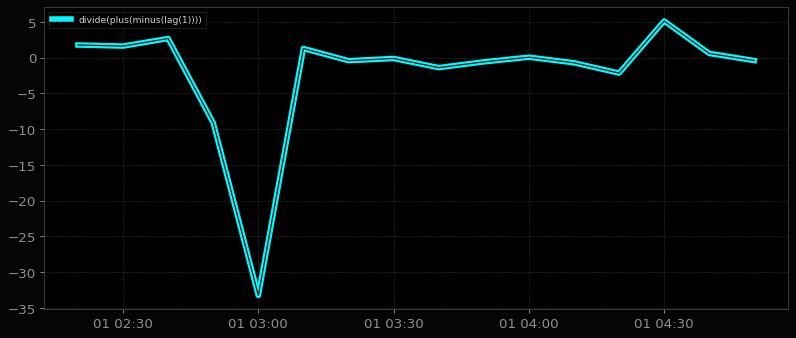

In [116]:
r1 = test_i(ts)
r1.plot(lw=5)

ds = ts.pd().diff()
a1 = test.apply_to_frame(test.sma, ds * (ds > 0), 14)
a2 = ds
plt.plot((a1 - a2) / (a1 + a2), c='k', lw=1)

<hr color='red'/>

#### Another bad example

<hr color='red'/>

In [117]:
T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100000)
data = list(zip(T, 1000 + (1*np.random.randn(len(T))).cumsum()))

In [118]:
def test_ii(ts: TimeSeries):
	a1 = sma(ts, 5) 
	a2 = sma(ts, 10) * 1000
	return a1 - a2

ts = TimeSeries('close', '10Min')
r11 = test_ii(ts)
test.push(ts, data[:300]);

~~~(998.8694567652657)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(998.7473726107655)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(998.7005759690713)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(999.0392904055112)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(999.6555862421584)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(1000.3663280157162)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000) -> nan
~~~(999.4646037797775)~~~
	sma(5) -> nan
  	sma(10) -> nan
    ~~~(nan)~~~
    	minus(mult(1000)) -> nan
    ~~~(nan)~~~
    	mult(1000

In [71]:
prn_tree(ts)

close
   sma(5)
      minus(mult(1000))
   sma(10)
      mult(1000)



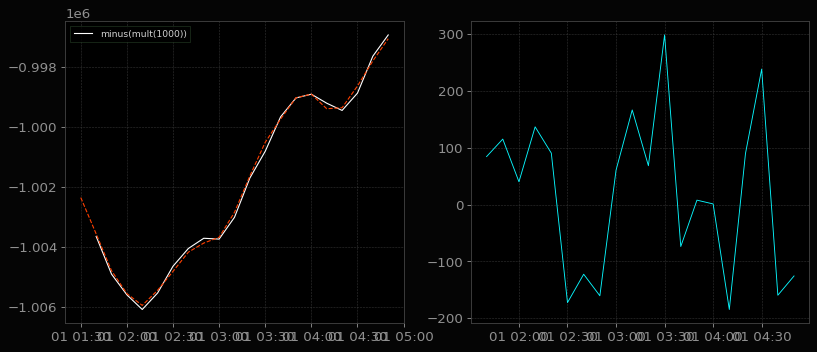

In [127]:
r11 = test_ii(ts)
# r11.plot(lw=4, c='w')

a1 = test.apply_to_frame(test.sma, ts.pd(), 5)
a2 = 1000*test.apply_to_frame(test.sma, ts.pd(), 10)
sbp(12,1); r11.plot(lw=1, c='w'); plt.plot(xs:=a1 - a2, c='#ff4000', lw=1, ls='--')
sbp(12,2);plt.plot(xs - test_ii(ts).pd());

<hr color='blue'/>

#### RSI (in depending on order of operations)

<hr color='blue'/>

In [128]:
def rsi(ts: TimeSeries, period: int):
	ds = ts - ts.shift(1)
	mu = sma(ds * (ds > 0), period)

	# - this doesn't work
	# md = -sma(ds * (ds < 0), period)
	# return mu / (mu + md)

	# - this works
	md = sma(ds * (ds < 0), period)
	return mu / (mu - md)

ts = TimeSeries('close', '2Min')
r1 = rsi(ts, 14)
test.push(ts, data[:100]);

~~~(998.8694567652657)~~~
	lag(1) -> nan
	minus(lag(1)) -> nan
  ~~~(nan)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> nan
    	lessthan(0) -> 0.0
    	mult(lessthan(0)) -> nan
      ~~~(nan)~~~
      	sma(14) -> nan
        ~~~(nan)~~~
        	sma(14) -> nan
        ~~~(nan)~~~
        	minus(sma(14)) -> nan
        	divide(minus(sma(14))) -> nan
~~~(998.7473726107655)~~~
	lag(1) -> nan
	minus(lag(1)) -> nan
  ~~~(nan)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> nan
    	lessthan(0) -> 0.0
    	mult(lessthan(0)) -> nan
      ~~~(nan)~~~
      	sma(14) -> nan
        ~~~(nan)~~~
        	sma(14) -> nan
        ~~~(nan)~~~
        	minus(sma(14)) -> nan
        	divide(minus(sma(14))) -> nan
~~~(998.7005759690713)~~~
	lag(1) -> 998.7473726107655
	minus(lag(1)) -> -0.04679664169418629
  ~~~(-0.04679664169418629)~~~
  	greaterthan(0) -> 0.0
  	mult(greaterthan(0)) -> -0.0
    	lessthan(0) -> 1.0
    	mult(lessthan(0)) -> -0.04679664169418629
      ~~~(-0.0)~~~
      

In [129]:
print(prn_tree(ts))

close
   lag(1)
   minus(lag(1))
      greaterthan(0)
      mult(greaterthan(0))
         sma(14)
            minus(sma(14))
            divide(minus(sma(14)))
      lessthan(0)
      mult(lessthan(0))
         sma(14)

None


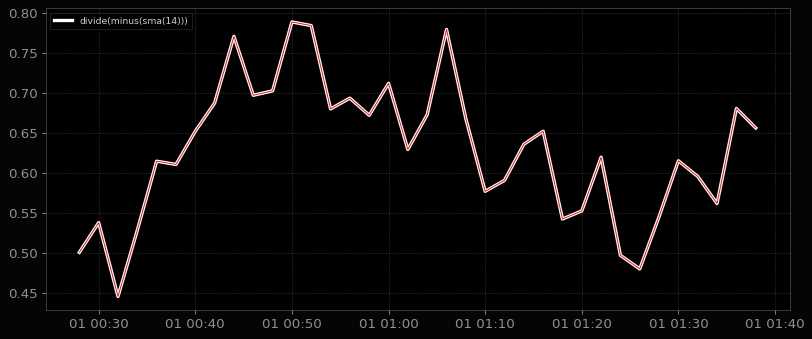

In [140]:
# r1 = rsi(ts, 14)
r1.plot(lw=3, c='w')
# plt.plot(test.rsi(ts.pd(), 14)/100)
ds = ts.pd().diff()
mu = test.apply_to_frame(test.sma, ds * (ds > 0), 14)
md = test.apply_to_frame(test.sma, ds * (ds < 0), 14)
plt.plot(mu/(mu - md), c='r')
# plt.plot((mu - md))
# plt.plot(mu)

In [141]:
# %%timeit
r1 = rsi(ts, 14)

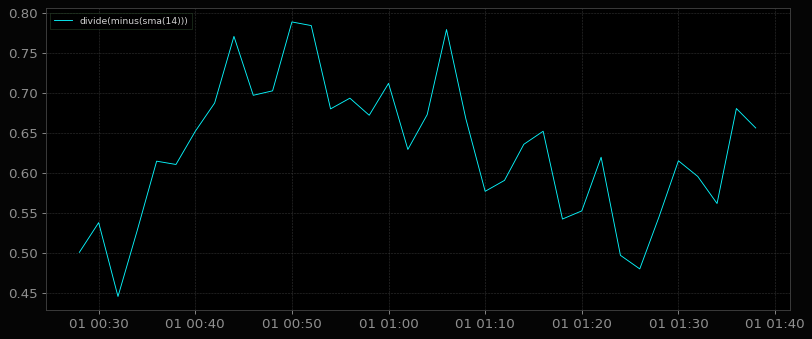

In [142]:
r1.plot()

In [143]:
if 1:
    x = ts.pd()
    xx = pd.concat((x, x.shift(1)), axis=1, keys=['c', 'p'])
    df = (xx.c - xx.p)
    mu2 = test.smooth(df.where(df > 0, 0), test.sma, 14)
    md2 = test.smooth(abs(df.where(df < 0, 0)), test.sma, 14)
    r2 = 100 * mu2 / (mu2 + md2)

In [ ]:
plt.plot(r1.pd())
plt.plot(r2)

In [ ]:
mu

In [ ]:
# plt.plot(100*mu.pd() / (mu.pd() + md.pd()))
# r1.plot()
# plt.plot(test.rsi(ts.pd(), p))

In [156]:
def stoch(series, period):
    return ((highest(series, period) - lowest(series, period)) / highest(series, period))

In [ ]:
# (ts * ((ts - ts.shift(1)) > 0)).plot()
(ts * ((ts - ts.shift(1)) < 0))#.plot()

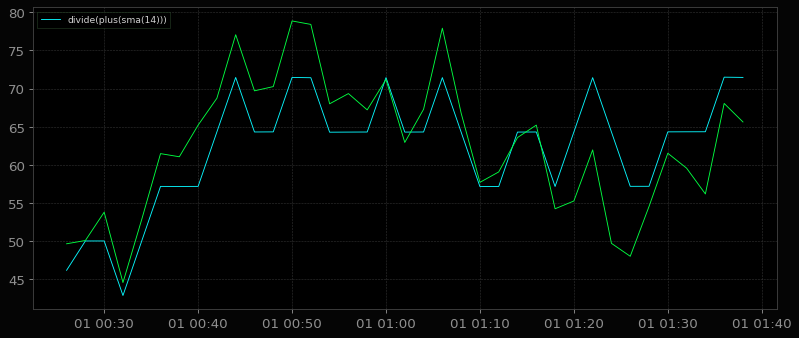

In [148]:
p = 14
rs = sma(ts * ((ts - ts.shift(1)) > 0), p)
ds = sma(ts * ((ts - ts.shift(1)) < 0), p) 
r1 = ((rs * 100) / (rs + ds))
r1.plot()
plt.plot(test.rsi(ts.pd(), p))

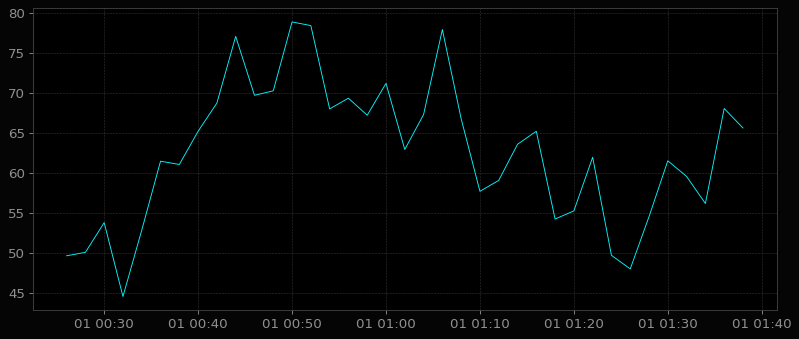

In [149]:
plt.plot(test.rsi(ts.pd(), 14))

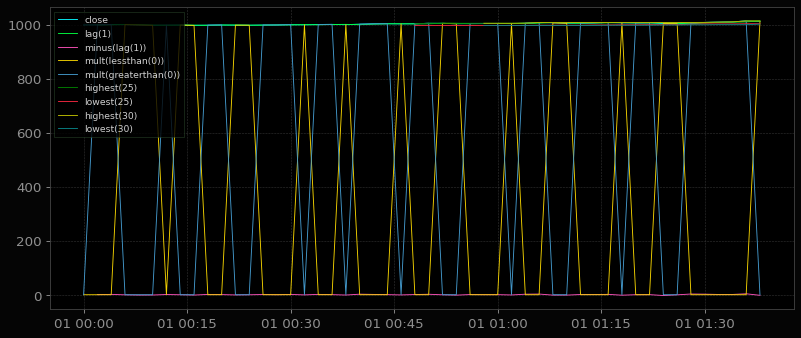

In [154]:
ts.plot(with_indicators=1)

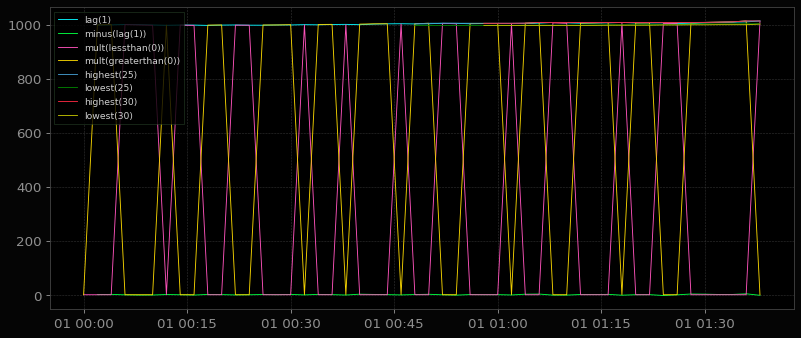

In [155]:
for k, vi in ts.get_indicators().items():
    plt.plot(vi.pd(), label=k)
plt.legend(loc=2)

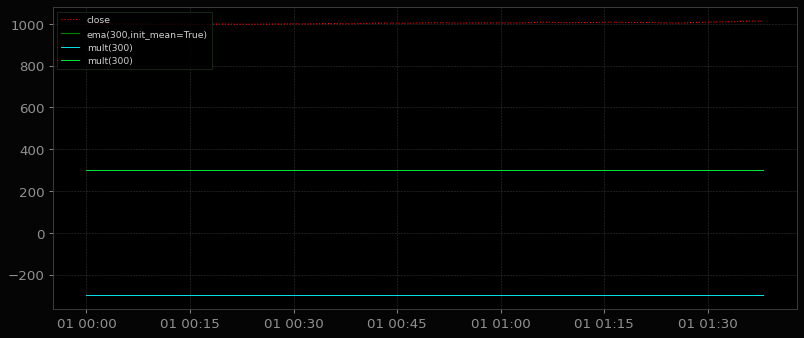

In [157]:
ts.plot(ls=':', lw=1, c='r')
# (ema(ema(ts, 50), 10)).plot(lw=1, c='g')
(ema(ts, 300)).plot(lw=1, c='g')

(((ts > ema(ts, 300))*2 - 1)*300).plot()
(((ts < ema(ts, 300))*2 + 1)*300).plot()

In [ ]:
plt.plot(ts.pd())

In [168]:
x = sma(ts, 15)

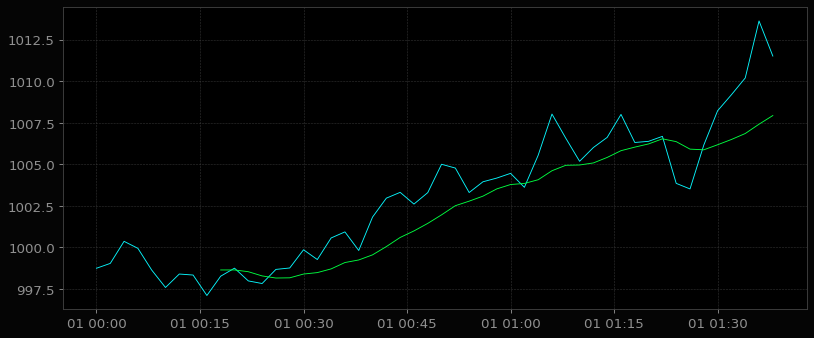

In [180]:
plt.plot(ts.pd())
plt.plot((sma(ts, 10)).pd())

In [182]:
test.scols(ts.pd(), sma(ts, 10).pd())

,close,sma(10)
2024-01-01 00:00:00,998.747373,NaN
2024-01-01 00:02:00,999.039290,NaN
2024-01-01 00:04:00,1000.366328,NaN
2024-01-01 00:06:00,999.946092,NaN
2024-01-01 00:08:00,998.640246,NaN
2024-01-01 00:10:00,997.589401,NaN
2024-01-01 00:12:00,998.399155,NaN
2024-01-01 00:14:00,998.338879,NaN
2024-01-01 00:16:00,997.108270,NaN
2024-01-01 00:18:00,998.270198,998.644523


In [ ]:
c = 1
((ts + sma(ts, 10))/c).pd()

In [167]:
ts.get_indicators()

{'sma(15)': <qube.core.series.Sma at 0x188073a03c0>,
 'sma(10)': <qube.core.series.Sma at 0x188073a0970>,
 'plus(divide(2))': <qube.core.series.Plus at 0x188031e2ac0>,
 'plus(divide(21))': <qube.core.series.Plus at 0x188031e2c40>,
 'plus(divide(-1000))': <qube.core.series.Plus at 0x188031e2dc0>,
 'plus(divide(-1))': <qube.core.series.Plus at 0x188031e2a40>,
 'plus(divide(1))': <qube.core.series.Plus at 0x188031e2440>,
 'plus(sma(10))': <qube.core.series.Plus at 0x1887da0ab40>}

In [109]:
ts.pd()

2024-01-01 00:00:00     -2.607196
2024-01-01 01:00:00     -5.109464
2024-01-01 02:00:00     10.511551
2024-01-01 03:00:00     -7.930545
2024-01-01 04:00:00    -23.576204
                          ...    
2024-03-10 06:00:00   -703.797913
2024-03-10 07:00:00   -720.468246
2024-03-10 08:00:00   -712.936513
2024-03-10 09:00:00   -719.258723
2024-03-10 10:00:00   -692.007145
Name: close, Length: 1667, dtype: float64

In [ ]:
ema(ts, 10).to_series()
ema(ts, 50).to_series()
tema(ts, 50).to_series()
dema(ts, 50).to_series()

In [ ]:
ts.get_indicators()

### OHLC tests

In [367]:
ohlc = OHLCV('1Min')
s1 = sma(ohlc.close, 10)
for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12), ('2024-01-01 00:10:01', 21),('2024-01-01 00:10:30', 1),('2024-01-01 00:10:31', 5),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4), ('2024-01-01 00:15:10', 12),
]:
    ohlc.update(recognize_time(t), v, 1)

In [369]:
r1 = RollingSum(3)

In [381]:
r1.update(1, 1); print(r1)
# r1.update(1, 1); print(r1)
# r1.update(1, 0); print(r1)

rs[3] = [1. 1. 1.] @ 0 -> 0


In [ ]:
ohlc.to_series()

In [385]:
print(str(ohlc), str(s1))

OHLCV[1Min] | 15 records
  2024-01-01T00:15:00.000000000 {o:4.000000 | h:12.000000 | l:4.000000 | c:12.000000 | v:2.000000}
  2024-01-01T00:14:00.000000000 {o:17.000000 | h:17.000000 | l:17.000000 | c:17.000000 | v:1.000000}
  2024-01-01T00:13:00.000000000 {o:15.000000 | h:15.000000 | l:15.000000 | c:15.000000 | v:1.000000}
   .......... 
  2024-01-01T00:02:00.000000000 {o:3.000000 | h:3.000000 | l:3.000000 | c:3.000000 | v:1.000000}
  2024-01-01T00:01:00.000000000 {o:2.000000 | h:3.000000 | l:2.000000 | c:2.000000 | v:3.000000}
  2024-01-01T00:00:00.000000000 {o:9.000000 | h:9.000000 | l:1.000000 | c:1.000000 | v:2.000000}
 sma(10)[1Min] | 15 records
  2024-01-01T00:15:00.000000000 10.6
  2024-01-01T00:14:00.000000000 9.9
  2024-01-01T00:13:00.000000000 8.6
   .......... 
  2024-01-01T00:02:00.000000000 nan
  2024-01-01T00:01:00.000000000 nan
  2024-01-01T00:00:00.000000000 nan



In [386]:
s1.to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     NaN
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [388]:
sma(ohlc.close, 10).to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     5.0
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [389]:
sma(ohlc.close, 8).to_series()

2024-01-01 00:00:00       NaN
2024-01-01 00:01:00       NaN
2024-01-01 00:02:00       NaN
2024-01-01 00:03:00       NaN
2024-01-01 00:04:00       NaN
2024-01-01 00:05:00       NaN
2024-01-01 00:07:00       NaN
2024-01-01 00:08:00     4.625
2024-01-01 00:09:00     5.500
2024-01-01 00:10:00     5.875
2024-01-01 00:11:00     7.125
2024-01-01 00:12:00     8.375
2024-01-01 00:13:00     9.625
2024-01-01 00:14:00    11.000
2024-01-01 00:15:00    11.500
Name: sma(8), dtype: float64

## How to work with indicators in strategy

In [71]:
xs = TimeSeries('close', '1h')
# compare(xs.shift(1), xs)
hh = highest(xs, 13)
ll = lowest(xs, 13)
test.push(xs, data)

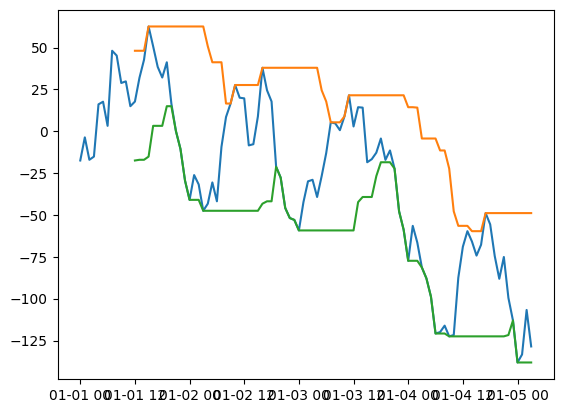

In [57]:
plt.plot(xs.pd()[:100])
plt.plot(highest(xs, 13).pd()[:100])
plt.plot(lowest(xs, 13).pd()[:100])
# plt.plot(hh.pd()[:100])
# plt.plot(xs.pd().rolling(13).max()[:100])

In [75]:
all(abs(highest(xs, 13).pd().dropna() - xs.pd().rolling(13).max().dropna()) <= 1e-4)

True

In [ ]:
test.scols(xs.to_series(), xs.shift(1).to_series(), compare(xs, xs.shift(1)).to_series())

In [ ]:
xs.update(pd.Timestamp('2024-03-10 15:00:01').asm8, 1)
test.scols(xs.pd(), xs.shift(1).pd(), compare(xs, xs.shift(1)).pd())

In [ ]:
xs.shift(1)

In [ ]:
for i in range(len(xs) - 1):
    if (ema(xs, 15)[i] > ema(xs, 50)[i]) and (ema(xs, 15)[i+1] < ema(xs, 50)[i+1]):
        print(pd.Timestamp(xs.times[i]))

In [ ]:
xs.get_indicators()